In [1]:
import sys
sys.path.append("/Users/fabrizioniro/Library/CloudStorage/GoogleDrive-fabrizion18@gmail.com/My Drive/Tesi/faultdiag-thesis/tesi-python/python_mcmcdagtargets")


############################################
##      Requires: NumPy, SciPy, tqdm      ##
############################################
from mcmcdagtargets import MCMCDagTargets

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

data = pd.read_csv("/Users/fabrizioniro/Library/CloudStorage/GoogleDrive-fabrizion18@gmail.com/My Drive/Tesi/faultdiag-thesis/tesi-python/data/data_processed.csv")


In [2]:
data

,CPT104,GEN_TENSIONE,IC113,PT212,TOV_POS,TT103,TT105,TT112,TT119,TT124,TT126,TT128,TT129,TT130,XT100,XT101,Fault
0,0.883274,-0.814951,0.854823,-0.025783,1.765200,-0.820087,0.965965,0.773948,0.805135,1.337211,-1.128067,-0.068788,-1.422122,-0.058423,1.342956,0.531226,0
1,0.845848,-0.051364,0.816195,-0.061000,1.765200,-0.924606,0.671964,0.731663,0.785257,1.034742,-1.116213,-0.017286,-1.347566,-0.090250,1.249340,0.821848,0
2,0.368861,-0.034452,0.355595,-0.075653,1.925981,-0.404904,0.550904,0.533631,0.483939,0.279106,-1.101581,-0.718582,-1.245898,-0.334857,1.062110,-0.340642,0
3,0.660309,0.695733,0.626271,-0.100589,1.675162,-0.548918,0.397952,0.606220,0.652213,0.666726,-1.040273,-0.445098,-1.421856,-0.229914,1.331254,0.821848,0
4,0.810014,0.620051,0.782665,-0.072172,1.874531,-0.718459,0.341801,0.750339,0.775023,0.659528,-1.247719,-0.121188,-1.336003,-0.161800,1.459975,1.693716,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0.196063,0.051377,0.213791,-0.088445,-0.029118,-0.150593,-0.114586,0.049475,0.191280,-0.071911,-0.284206,0.095230,-0.026681,-0.291578,-0.061273,-0.050019,1
1588,0.196063,0.051377,0.213791,-0.088445,-0.029118,-0.150593,-0.114586,0.049475,0.191280,-0.071911,-0.284206,0.095230,-0.026681,-0.291578,-0.061273,-0.050019,1
1589,0.196063,0.051377,0.213791,-0.088445,-0.029118,-0.150593,-0.114586,0.049475,0.191280,-0.071911,-0.284206,0.095230,-0.026681,-0.291578,-0.061273,-0.050019,1
1590,0.196063,0.051377,0.213791,-0.088445,-0.029118,-0.150593,-0.114586,0.049475,0.191280,-0.071911,-0.284206,0.095230,-0.026681,-0.291578,-0.061273,-0.050019,1


In [3]:
mcmc = MCMCDagTargets(seed = None)

K     = 2
n_all = [data[data["Fault"] == 0].shape[0], data[data["Fault"] == 1].shape[0]]
X = data.drop(columns=["Fault"])
X = np.matrix(X)
q = X.shape[1]

In [4]:
## Fix hyperparameters of Beta(a_k,b_k) prior on the probabilities of intervention and prior probability of edge inclusion w
a_k = 1/q
b_k = 1
w   = 0.1

## Fix number of MCMC iterations and burn-in
S    = 200000
burn = 50000

# Run MCMC algorithm
out = mcmc.mcmc_dag_targets(
    X = X, 
    S = S, 
    burn = burn,
    w = w, a = None, a_k = a_k, b_k = b_k, n_all = n_all)

Targets_estimate = out['Targets_estimate']
P_DAG_estimate = out['P_DAG_estimate']
DAG_estimate = out['DAG_estimate']

MCMC Sampling:   0%|          | 0/200000 [00:00<?, ?it/s]

In [5]:
mcmc.isDAG(DAG_estimate)

True

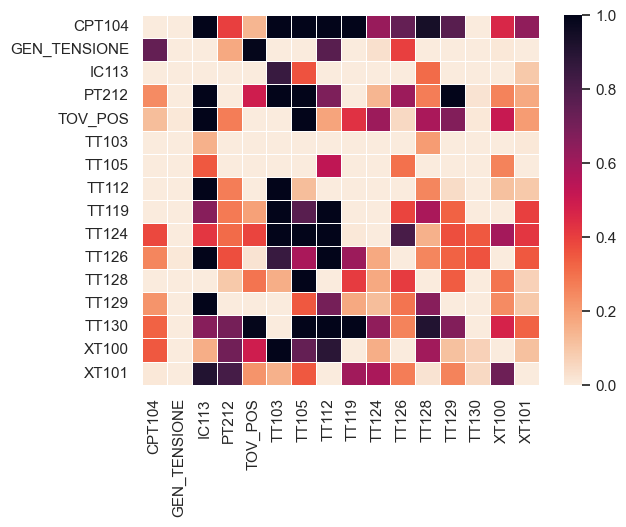

In [6]:

sns.set_theme(style="white")
palette = sns.color_palette("rocket_r", as_cmap=True)
DAG_hm = sns.heatmap(P_DAG_estimate, linewidths=.5, cmap=palette)

DAG_hm.set_xticklabels(data.columns.drop('Fault'), rotation=90)
DAG_hm.set_yticklabels(data.columns.drop('Fault'), rotation=0)

plt.show()

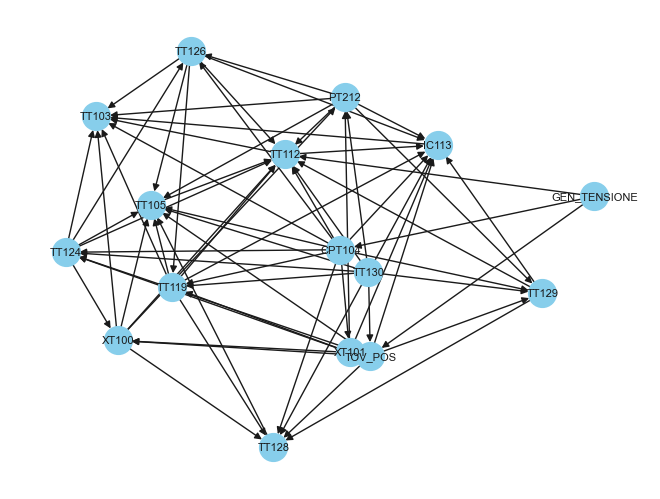

In [11]:
# Example arrays of keys and values
keys = [i for i in range(len(data.columns.drop('Fault')))]
values = data.columns.drop('Fault')
# Initialize an empty dictionary
labels = {}
# Create the dictionary by iterating through the arrays
for i in range(len(keys)):
    labels[keys[i]] = values[i]
    


G = nx.DiGraph(DAG_estimate)
pos = nx.kamada_kawai_layout(G)  # Layout algorithm (you can choose other layouts)
nx.draw(G, pos, with_labels=True, labels=labels, node_size=400, node_color='skyblue', font_size=8, arrows=True)

plt.show()

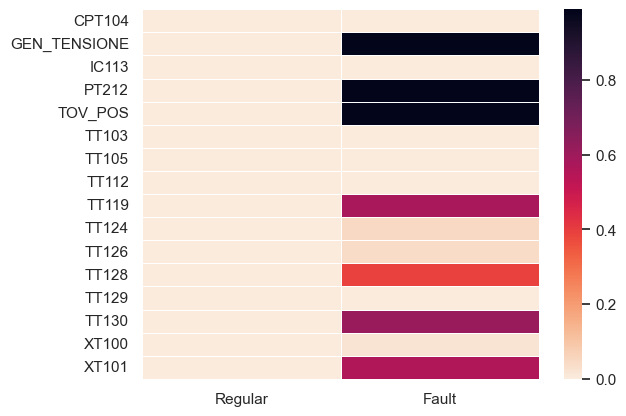

In [8]:
rows = data.columns.drop('Fault')
df_int_est = pd.DataFrame(Targets_estimate, index=rows, columns=['Regular', 'Fault'])

Targets_hm = sns.heatmap(df_int_est, linewidths=.5, cmap=palette)
plt.show()